## Techniques to Prevent Overfitting

- Regularization
- Dropout

## Techniques for Speeding Calculations on GPU's
- Matrix Represenation of Weights
- Matrix Represenation of Input ... (batch learning)

![Net](img/one_hidden.png)
Source: [TechNote](http://www.sharetechnote.com/html/EngMath_Matrix_NeuralNetwork.html)

### w'X = output
#### Weight Matrix (with weights as columns for each neuron) (transpose) * X (the input vector) = Output for that layer
![Matrix](img/weight_matrix.png)


# Convolutional Neural Nets
### or, When What Your Neighbor Says Matters

![conv_net](img/Cnn_layer.png)
Source: [Stanford Tutorial](http://ufldl.stanford.edu/tutorial/supervised/ConvolutionalNeuralNetwork/)

### What does each filter look like?

![mapping](img/conv_math.jpg)
Source: [Apple](https://developer.apple.com/library/ios/documentation/Performance/Conceptual/vImage/ConvolutionOperations/ConvolutionOperations.html)

Here you can see the output 'image' will be smaller than the input by the width of the border around the center of each kernel.

### May need to
    conda install sklearn
or

    pip install sklearn

## Digit Recognizer in Python using Convolutional Neural Nets
### by [Koba Khitalishvili](http://www.kobakhit.com/)
### and tuning by [Deep Learning](http://neuralnetworksanddeeplearning.com/chap6.html)

In [1]:
%matplotlib inline

import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import confusion_matrix, accuracy_score

## MNIST from Kaggle

In [9]:
# dataset = pd.read_csv("train.csv")
# target = dataset[[0]].values.ravel()
# train = dataset.iloc[:,1:].values
# test = pd.read_csv("test.csv").values

## DL MNIST
### Normalized dataset with separated validation and test sets

In [3]:
import cPickle, gzip

# Load the dataset
f = gzip.open('mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = cPickle.load(f)
f.close()

In [4]:
train = np.vstack((train_set[0], valid_set[0]))
target = np.hstack((train_set[1], valid_set[1]))
test = test_set[0]
test_target = test_set[1]

In [14]:
train.shape

(60000, 784)

In [15]:
target.shape

(60000,)

In [5]:
target = target.astype(np.uint8)
train = np.array(train).reshape((-1, 1, 28, 28))
test = np.array(test).reshape((-1, 1, 28, 28))

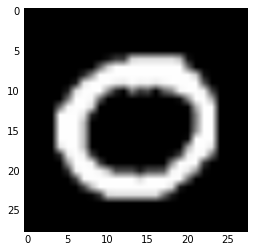

In [6]:
plt.imshow(train[1729][0], cmap=cm.Greys_r)

### Size of Filters
- Should it be odd?
- What does zero padding have to do with anything?

In [7]:
def CNN(n_epochs):
    net1 = NeuralNet(
        layers=[
        ('input', layers.InputLayer),        # If you add layers here, add them below as well
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),   
        ('conv2', layers.Conv2DLayer),
        ('hidden3', layers.DenseLayer),
        ('dropout3', layers.DropoutLayer),
        ('output', layers.DenseLayer),
        ],

    input_shape=(None, 1, 28, 28),
    conv1_num_filters=20,                     
    conv1_filter_size=(5, 5), 
    conv1_nonlinearity=lasagne.nonlinearities.rectify,
        
    pool1_pool_size=(2, 2),
        
    conv2_num_filters=40, 
    conv2_filter_size=(5, 5),    
    conv2_nonlinearity=lasagne.nonlinearities.rectify,
        
    hidden3_num_units=100,
    output_num_units=10,
#     dropout3_p=0.5,
    output_nonlinearity=lasagne.nonlinearities.softmax,

    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,

    max_epochs=n_epochs,
    verbose=1,
    )
    return net1

cnn = CNN(10).fit(train,target) # train the CNN model for 15 epochs

# Neural Network with 277670 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     1x28x28
  1  conv1     20x24x24
  2  pool1     20x12x12
  3  conv2     40x8x8
  4  hidden3   100
  5  dropout3  100
  6  output    10

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  ------
      1       0.50252       0.13556      3.70709      0.95960  46.03s
      2       0.16423       0.08974      1.83004      0.97411  46.04s
      3       0.11465       0.07295      1.57173      0.97928  45.69s
      4       0.09570       0.06284      1.52303      0.98230  44.86s
      5       0.08002       0.06200      1.29073      0.98230  45.14s
      6       0.06844       0.05207      1.31434      0.98521  45.27s
      7       0.05835       0.05327      1.09529      0.98446  47.75s
      8       0.05364       0.04661      1.15084      0.98629  52.97s
      9       0.04865       0.04366 

#### Dropout
- Why does the train loss stay above the validation loss?
- When should we stop trying more epochs?
- Why does it take so much longer?

In [16]:
# pred = cnn.predict(test)

# # save results
# np.savetxt('submission_cnn.csv', np.c_[range(1,len(test)+1),pred], delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')

In [8]:
predict = cnn.predict(test)
print confusion_matrix(test_target, predict)
print "accuracy: ", accuracy_score(test_target, predict)

[[ 977    1    0    0    0    0    0    1    1    0]
 [   0 1130    1    1    0    0    1    1    1    0]
 [   2    1 1024    2    0    0    0    3    0    0]
 [   1    0    4  996    0    3    0    5    1    0]
 [   0    0    1    0  971    0    3    0    1    6]
 [   2    0    0    6    0  880    2    1    1    0]
 [   6    2    0    0    1    6  942    0    1    0]
 [   0    2    6    1    0    0    0 1017    1    1]
 [   5    0    4    1    1    1    0    2  955    5]
 [   2    2    0    0    4    1    0    7    1  992]]
accuracy:  0.9884


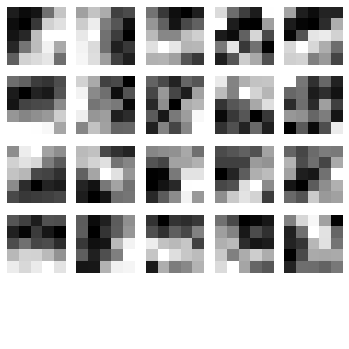

In [9]:
visualize.plot_conv_weights(cnn.layers_['conv1'])
plt.show()

## Effects of the Kernels

### Averaging each pixel with its neighboring values blurs an image:

![blur_kernel](img/conv_blur.png)![taj_mahal](img/taj.jpg)

### Taking the difference between a pixel and its neighbors detects edges:

(To understand this one intuitively, think about what happens in parts of the image that are smooth, where a pixel color equals that of its neighbors: The additions cancel and the resulting value is 0, or black. If there’s a sharp edge in intensity, a transition from white to black for example, you get a large difference and a resulting white value)

![edge_kernel](img/edge.png)![taj_mahal_edge](img/edge_taj.jpg)

Source: From [Understanding Convolutional Neural Networks for NLP](http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/)

## Output From 1st Conv Layer Given a Specific Input

In [10]:
x = train[1729][0].reshape(1, 1, 28, 28)

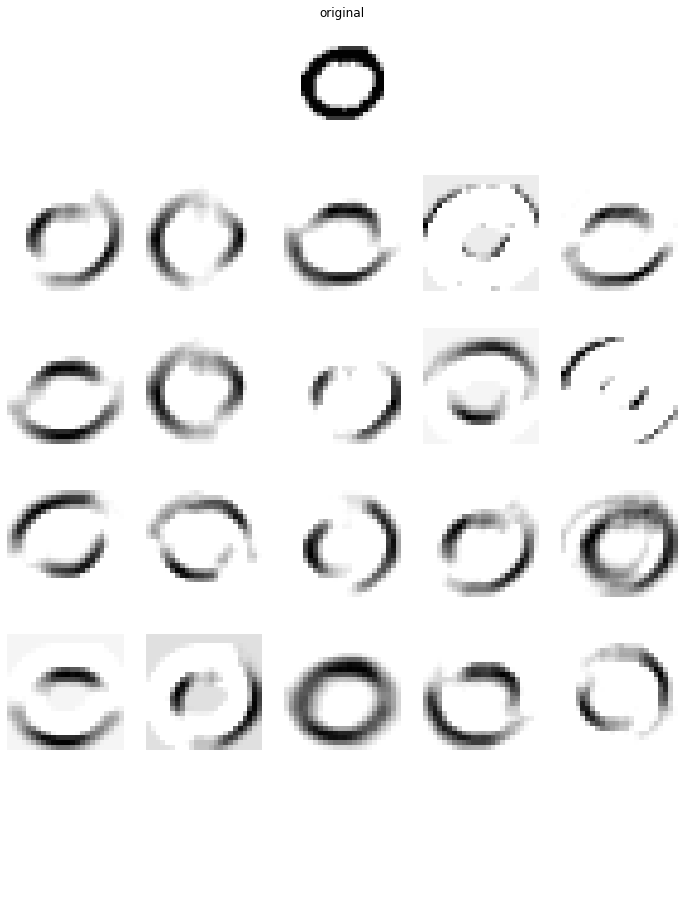

In [11]:
visualize.plot_conv_activity(cnn.layers_['conv1'], x, figsize=(12, 16))
plt.show()

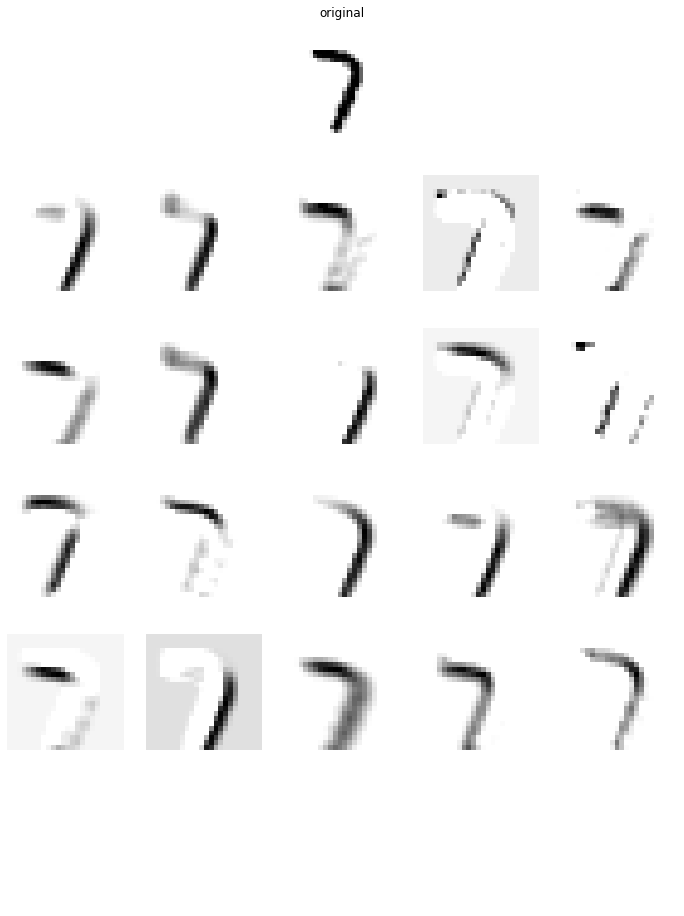

In [12]:
x = train[1730][0].reshape(1, 1, 28, 28)
visualize.plot_conv_activity(cnn.layers_['conv1'], x, figsize=(12, 16))
plt.show()

## Second Layer Magic
- What is this learning?
- Activations for a given input.

KeyboardInterrupt: 

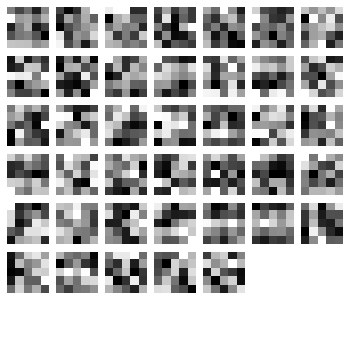

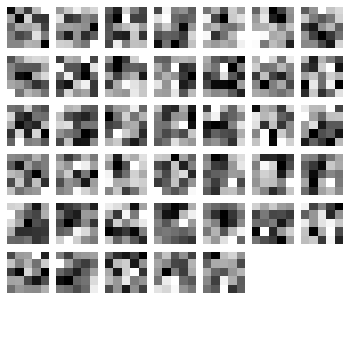

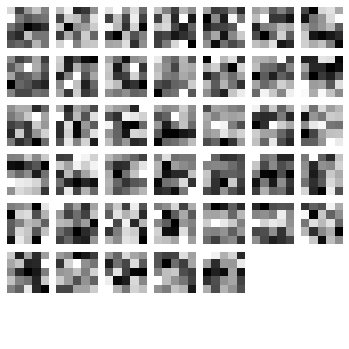

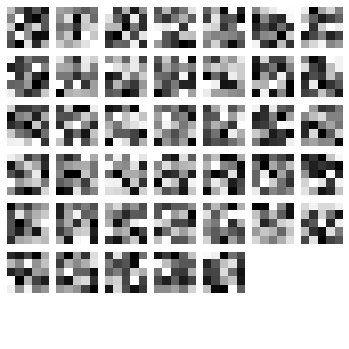

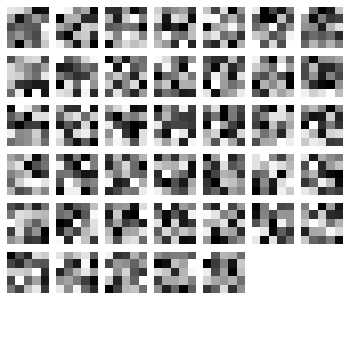

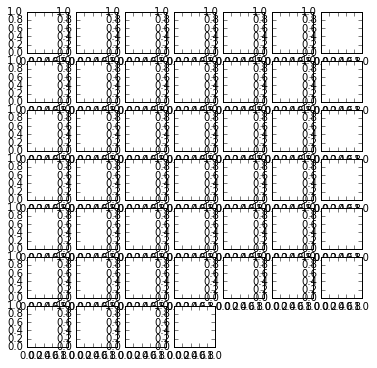

In [17]:
visualize.plot_conv_weights(cnn.layers_['conv2'])
plt.show()

## Output From 2nd Conv Layer Given a Specific Input

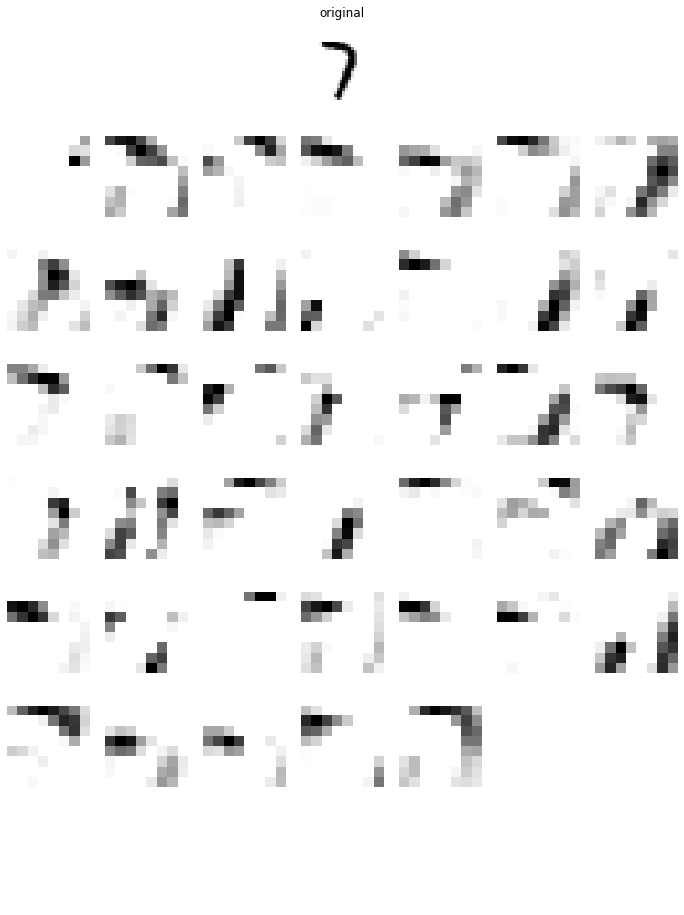

In [13]:
visualize.plot_conv_activity(cnn.layers_['conv2'], x, figsize=(12, 16))
plt.show()

## Pooling

- Max
- Average
- Why? Reduce Dimensionality
- Added resiliance in the face of turbulent data (in the case of Max)
- Not too big or we start to lose information.

## Standard Feed Forward Net on the End

## Backpropogation
- Normal through Feed-Forward layers
- Must remember the source from the max pooling layer and only adjust the weight of the responsible party!

## Mesmerizing Diversion

[Crazyiness in Javascript](https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html)